In [2]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Define the column names
col= ['ID', 'Topic', 'Sentiment', 'Text']
#Load the sample dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\archive\twitter_training.csv", names=col)
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
df.tail()

,ID,Topic,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [17]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [18]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [19]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [20]:
# Remove duplicates(DATA CLEANING)
df.drop_duplicates(inplace=True)

In [21]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64


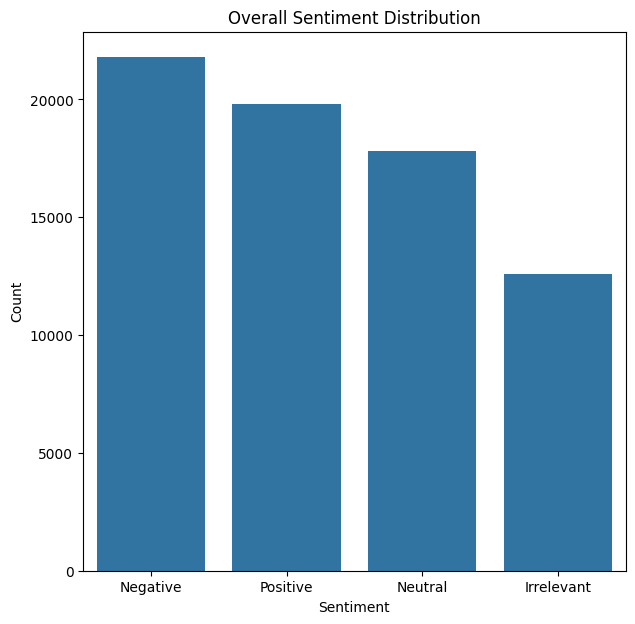

In [23]:
#Visualization of Sentiment Distribution
plt.figure(figsize=(7,7))
sns.countplot(x='Sentiment', data=df, order=sentiment_counts.index)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [5]:
topic_sentiment_counts = df.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)
print(topic_sentiment_counts)


Sentiment                          Irrelevant  Negative  Neutral  Positive
Topic                                                                     
Amazon                                    192       576     1236       312
ApexLegends                               192       600      942       642
AssassinsCreed                            264       378      156      1446
Battlefield                               918       474      360       594
Borderlands                               240       426      600      1020
CS-GO                                     636       348      552       768
CallOfDuty                                672       894      378       450
CallOfDutyBlackopsColdWar                 576       576      360       864
Cyberpunk2077                             480       390      468       966
Dota2                                     426       768      588       582
FIFA                                      558      1176      102       504
Facebook                 

<Figure size 1000x1000 with 0 Axes>

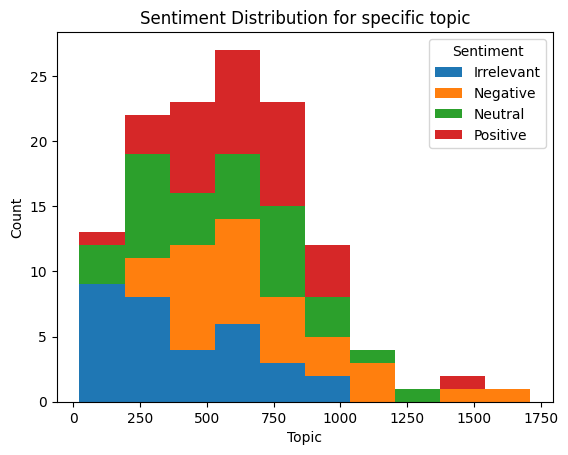

In [6]:
#VISUALIZATION OF SENTIMENT PATTERNS BY TOPIC
plt.figure(figsize=(10,10))
topic_sentiment_counts.plot(kind='hist', stacked=True)
plt.title('Sentiment Distribution for specific topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

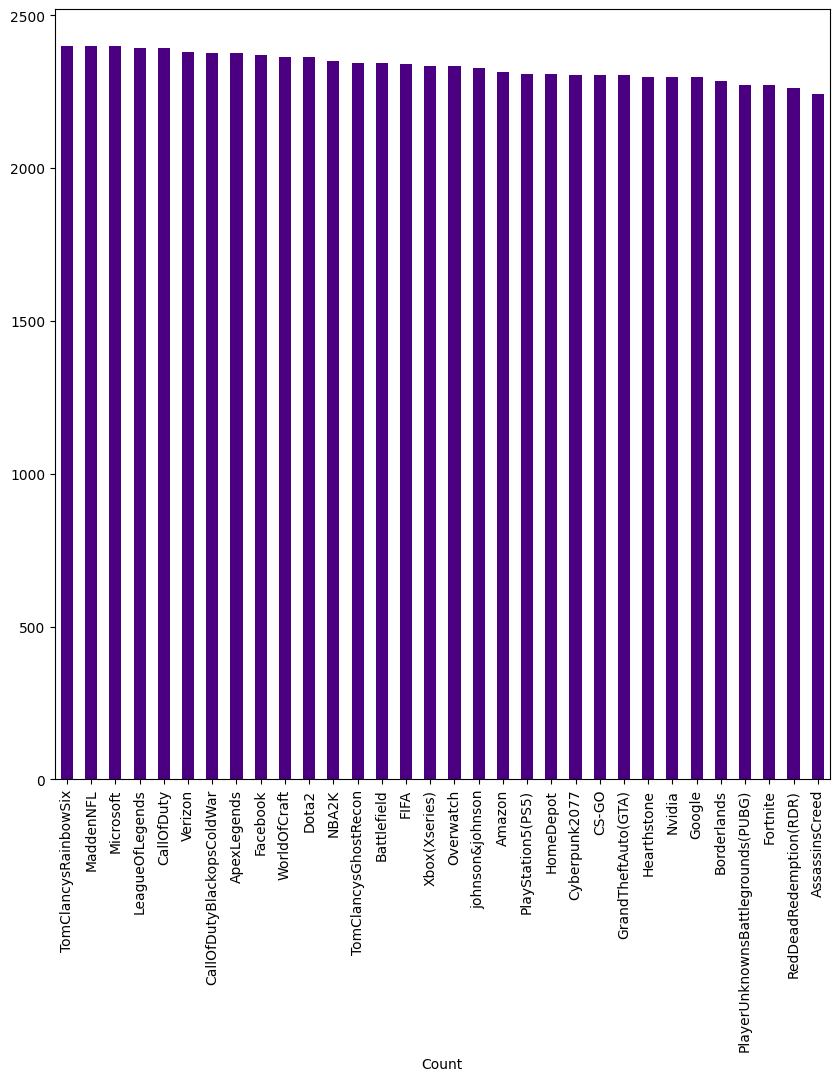

In [9]:
plt.figure(figsize=(10,10))
df['Topic'].value_counts().plot(kind='bar',color='Indigo')
plt.xlabel("Count")
plt.show()

In [9]:
df['Text'] = df['Text'].astype(str)

In [32]:
# Function to plot pie chart for sentiment distribution of a specific topic
def plot_pie_chart(topic):
    topic_data = df[df['Topic'] == topic]
    sentiment_counts = topic_data['Sentiment'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {topic}')
    plt.show()

# Function to generate word cloud for a specific sentiment and topic
def generate_word_cloud(topic, sentiment):
    text = " ".join(str(review) for review in df[(df['Topic'] == topic) & (df['Sentiment'] == sentiment)]['Text'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment in {topic}')
    plt.show()

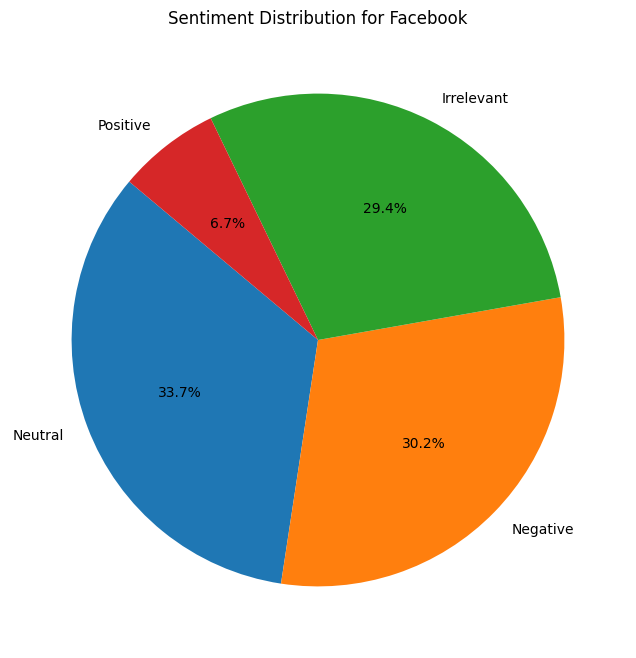

In [27]:
#Generate pie chart for 'FACEBOOK'
plot_pie_chart('Facebook')

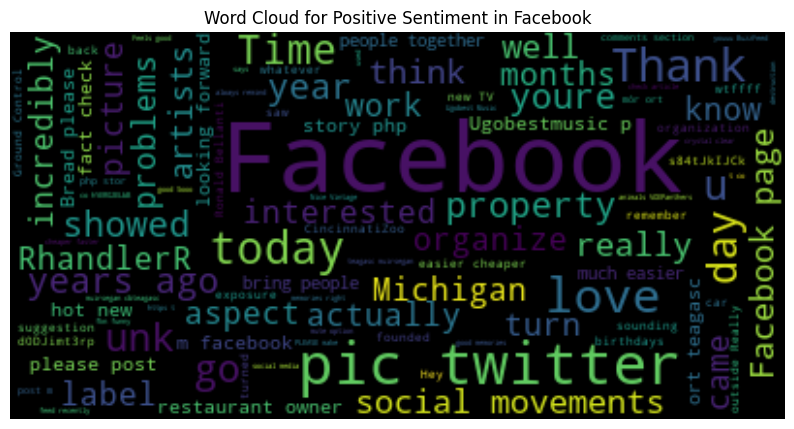

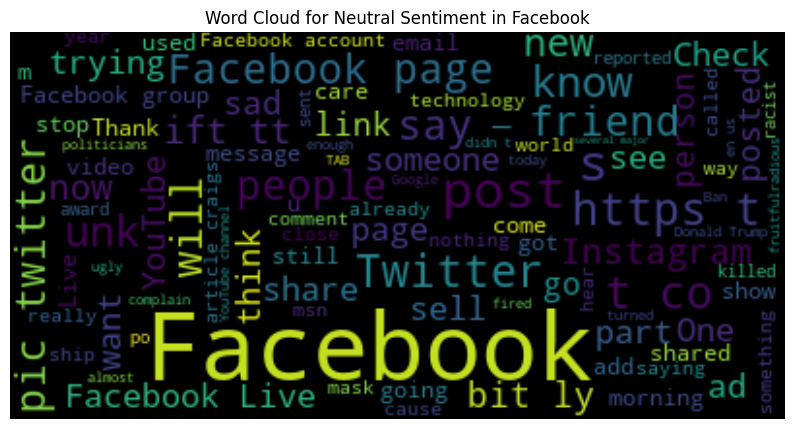

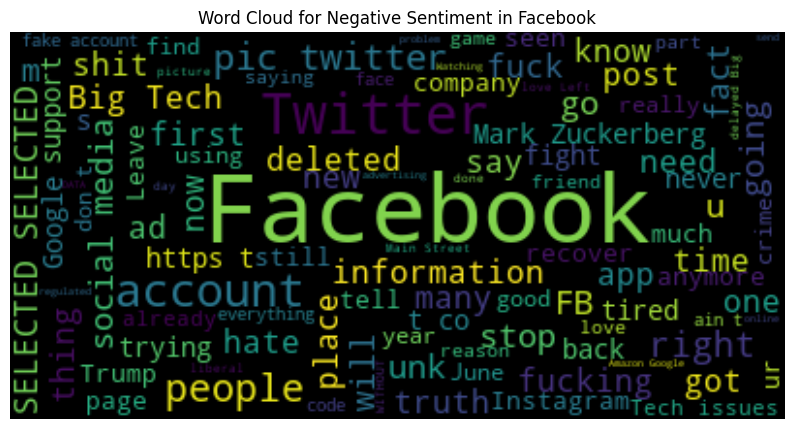

In [33]:
#Generate word clouds for 'Facebook'
generate_word_cloud('Facebook', 'Positive')
generate_word_cloud('Facebook', 'Neutral')
generate_word_cloud('Facebook', 'Negative')